# Question

### Why is it not improving after boosting? why predicted values of errors after 1st tree always 0? Is it because I am taking only 1 variable and 1 layer?

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from IPython.display import display
from sklearn import metrics

In [99]:
# will take only 1 x here. So simplyfying this class/method

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

class SimpleDecisionTree():
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.n = len(x)
        #self.val = np.mean(y)
        self.score = float('inf')
    
    def find_btr_splt(self):
        sort_idx = np.argsort(x)  # give indexes -> ascending
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.
        
        for i in range(0,self.n-2):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<1 or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.score,self.split = curr_score,xi
                
    @property
    def is_leaf(self): return self.score == float('inf')
                
    def __repr__(self):
        s = f'n: {self.n}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}'
        return s
        

## simulated data

In [438]:
# x1 = np.random.uniform(0,2,10) 
# x2 = np.random.uniform(3,10,10) 
# x3 = np.array([10.5, 11.7, 11.9, 12.3, 14.2])
# x4 = np.random.uniform(15,17,5)

# x = np.concatenate((x1, x2, x3, x4))

x = np.arange(0,50)

In [439]:
x, len(x)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 50)

In [538]:
y1 = np.random.uniform(17,20,15)
y2 = np.array([15.3, 14.2, 13.6, 12.7,10.2])  # 10.5, 11.9, 9.1, 8.8, 9.5
y3 = np.array([9.4, 12.2, 13, 13.3, 16.2, 14.2, 15.7, 66, 50, 52])  # introduced 3 outliers
y4 = np.random.normal(20,3,10)
y5 = np.random.uniform(18,22,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y, len(y)

(array([ 18.40807,  18.3318 ,  17.95439,  19.67335,  18.98169,  17.25906,  17.1571 ,  19.84594,  18.28242,
         18.53482,  18.58394,  19.76573,  17.3511 ,  17.6951 ,  17.55259,  15.3    ,  14.2    ,  13.6    ,
         12.7    ,  10.2    ,   9.4    ,  12.2    ,  13.     ,  13.3    ,  16.2    ,  14.2    ,  15.7    ,
         66.     ,  50.     ,  52.     ,  20.76591,  16.04202,  25.19873,  16.12253,  22.25406,  21.40101,
         16.17   ,  15.85754,  18.87107,  22.52571,  21.76044,  21.77742,  20.9608 ,  20.91235,  19.66087,
         19.81815,  20.95567,  21.53598,  18.08774,  21.18771]), 50)

## plot of data

Text(0,0.5,'y')

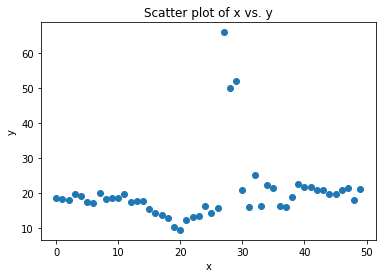

In [539]:
plt.scatter(x,y)
plt.title("Scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")

## 1st tree

In [540]:
tree = SimpleDecisionTree(x,y)

In [541]:
tree.find_btr_splt()

In [542]:
tree

n: 50; score:367.32426202250673; split:26

### making line for split

In [543]:
r = np.where(x == tree.split)[0][0]
print(r)

n = len(y)
print(n)

26
50


In [544]:
left_idx = np.where(x <= tree.split)[0]
right_idx = np.where(x > tree.split)[0]

In [545]:
ypred = np.zeros(n)
np.put(ypred, left_idx, np.repeat(np.mean(y[left_idx]), r))  # replace left side mean y
np.put(ypred, right_idx, np.repeat(np.mean(y[right_idx]), n-r))  # right side mean y

In [546]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [547]:
ypred

array([ 16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,
        16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,
        16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,  16.12508,
        24.77677,  24.77677,  24.77677,  24.77677,  24.77677,  24.77677,  24.77677,  24.77677,  24.77677,
        24.77677,  24.77677,  24.77677,  24.77677,  24.77677,  24.77677,  24.77677,  24.77677,  24.77677,
        24.77677,  24.77677,  24.77677,  24.77677,  24.77677])

In [548]:
e1 = y - ypred
e1, np.mean(e1)

(array([  2.283  ,   2.20672,   1.82932,   3.54827,   2.85661,   1.13398,   1.03202,   3.72086,   2.15735,
          2.40974,   2.45886,   3.64065,   1.22602,   1.57003,   1.42751,  -0.82508,  -1.92508,  -2.52508,
         -3.42508,  -5.92508,  -6.72508,  -3.92508,  -3.12508,  -2.82508,   0.07492,  -1.92508,  -0.42508,
         41.22323,  25.22323,  27.22323,  -4.01086,  -8.73475,   0.42196,  -8.65424,  -2.52271,  -3.37576,
         -8.60677,  -8.91923,  -5.9057 ,  -2.25106,  -3.01633,  -2.99935,  -3.81597,  -3.86442,  -5.1159 ,
         -4.95862,  -3.8211 ,  -3.24079,  -6.68903,  -3.58906]),
 1.4210854715202004e-16)

### visualizing prediction boundries

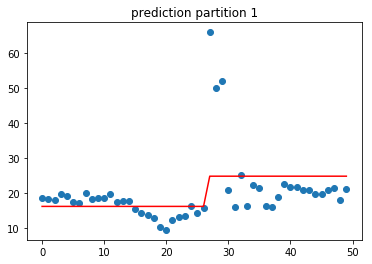

In [549]:
order = np.argsort(x)
xs = np.array(x)[order]
ys = np.array(ypred)[order]

plt.figure()
plt.scatter(x,y)
plt.plot(xs, ys, 'r')
plt.title('prediction partition 1')
plt.show()

Text(0.5,1,'residuals vs. x')

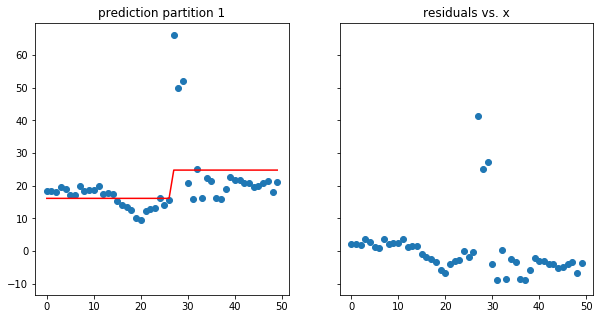

In [550]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10,5))

ax1.scatter(x,y)
ax1.plot(xs, ys, 'r')
ax1.set_title('prediction partition 1')

ax2.scatter(x, e1)
ax2.set_title('residuals vs. x')

## 2nd tree

Before continuing further, I would like to remind you about the statistical assumptions that we have for our linear models. Although, tree based models are not based on any assumptions. But there is one very logical assumption which if True would make the model better. 

The assumption is `mean of residuals = 0`  

The intuition is that our residuals (errors) should be at a stage that they can't be modelled. If we can model residuals (if there is some pattern in residuals), that means that there is still scope of improvement in our model.  

See the RHS plot above. If we see a pattern on residuals, it means that our residuals are not random (random normal) and can be modelled.  

`Gradient boosting` just leverages this minute logic. `It tries to model those prediction error of our weak model and tries to make it random with mean = 0` . Let's do this now. 



In [551]:
# our new y will be residuals (i.e. let's model residuals from our independent variables)  
e1 

array([  2.283  ,   2.20672,   1.82932,   3.54827,   2.85661,   1.13398,   1.03202,   3.72086,   2.15735,
         2.40974,   2.45886,   3.64065,   1.22602,   1.57003,   1.42751,  -0.82508,  -1.92508,  -2.52508,
        -3.42508,  -5.92508,  -6.72508,  -3.92508,  -3.12508,  -2.82508,   0.07492,  -1.92508,  -0.42508,
        41.22323,  25.22323,  27.22323,  -4.01086,  -8.73475,   0.42196,  -8.65424,  -2.52271,  -3.37576,
        -8.60677,  -8.91923,  -5.9057 ,  -2.25106,  -3.01633,  -2.99935,  -3.81597,  -3.86442,  -5.1159 ,
        -4.95862,  -3.8211 ,  -3.24079,  -6.68903,  -3.58906])

In [552]:
tree2 = SimpleDecisionTree(x,e1)

In [553]:
tree2.find_btr_splt()

In [554]:
tree2

n: 50; score:367.32426202250673; split:26

index where it got split

In [555]:
r = np.where(x == tree.split)[0][0]
print(r)

n = len(y)

26


In [556]:
left_idx = np.where(x <= tree.split)[0]
right_idx = np.where(x > tree.split)[0]

In [557]:
epred = np.zeros(n)
np.put(epred, left_idx, np.repeat(np.mean(e1[left_idx]), r))  # replace left side mean y
np.put(epred, right_idx, np.repeat(np.mean(e1[right_idx]), n-r))  # right side mean y

In [558]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

### Why are these 0 ? Then what is point of this algo?

In [559]:
epred

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])

In [561]:
e2 = e1 - epred

### Visualizing  prediction boundries for 1st errors (not actual Ys)

In order to find prediction of actual y, we can just add predicted values with predicted errors 

Text(0.5,1,'residuals2 vs. x')

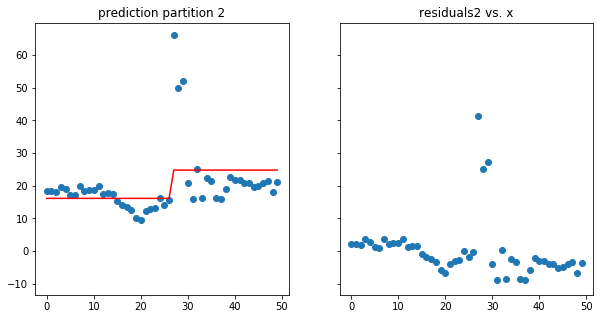

In [562]:
order = np.argsort(x)
xs = np.array(x)[order]
ys = np.array(ypred + epred)[order]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10,5))

ax1.scatter(x,y)
ax1.plot(xs, ys, 'r')
ax1.set_title('prediction partition 2')

ax2.scatter(x, e2)
ax2.set_title('residuals2 vs. x')

### why is it not improving after boosting? why predicted values of errors always 0?